In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import log2
from math import sqrt
from numpy import asarray
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import glob
#import missingno as msno
import datetime
#from fbprophet import Prophet
%matplotlib inline
#import mplcyberpunk

In [2]:
df14 = pd.read_csv('../../Taipei_14.csv')
df15 = pd.read_csv('../../Taipei_15.csv')
df16 = pd.read_csv('../../Taipei_16.csv')
df17 = pd.read_csv('../../Taipei_17.csv')
df18 = pd.read_csv('../../Taipei_18.csv')
###########################################
df14 = df14.rename(columns={"PM2.5": "PM"})
df15 = df15.rename(columns={"PM2.5": "PM"})
df16 = df16.rename(columns={"PM2.5": "PM"})
df17 = df17.rename(columns={"PM2.5": "PM"})
df18 = df18.rename(columns={"PM2.5": "PM"})
df4= pd.DataFrame(df14)
df5= pd.DataFrame(df15)
df6= pd.DataFrame(df16)
df7= pd.DataFrame(df17)
df8= pd.DataFrame(df18)

In [3]:
r1=(df4[df14.SiteEngName =='Tamsui'])
(r1.PM)

8         26.0
26        28.0
44        31.0
62        35.0
80        36.0
          ... 
157598    22.0
157616    20.0
157634    20.0
157652    35.0
157670    58.0
Name: PM, Length: 8760, dtype: float64

In [4]:
r=(df4[df14.SiteEngName =='Banqiao'])
s=(df5[df15.SiteEngName =='Banqiao'])
t=(df6[df16.SiteEngName =='Banqiao'])
u=(df7[df17.SiteEngName =='Banqiao'])
v=(df8[df18.SiteEngName =='Banqiao'])
#print(r.PM==s.PM)
#print(r.PM)
p=r.PM
q=s.PM
p1=t.PM
q1=u.PM
p2=v.PM;

In [5]:
plt.rcParams['font.family']='Tahoma'
plt.rcParams['font.size']=11
p.resample('M').mean().plot(kind='bar', color='green', figsize=(12,5))
plt.xticks(rotation=90)
plt.ylabel('pm25')
plt.title('สถานการณ์ฝุ่น PM2.5 จำแนกตามรายเดือน ตั้งแต่ปี 2016-2020\n')
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [ ]:
plt.figure(figsize=(20,9))
plt.plot(p[:360] , 'blue', linewidth=4)
plt.plot(q[:360],'r' , linewidth=4)
plt.legend(('Banqiao-2014','Banqiao-2015'))
plt.show()

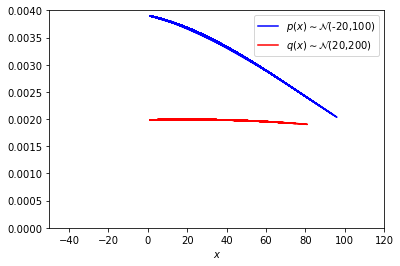

In [12]:
example_num = 100
m_1, s_1 = -20, 100
m_2, s_2 = 20, 200

# example_num = 2
# m_1, s_1 = 0, 0.5
# m_2, s_2 = 0, 3

# example_num = 3
# m_1, s_1 = 2, 1
# m_2, s_2 = -2, 1

# example_num = 4
# m_1, s_1 = -5, 1
# m_2, s_2 = 5, 2


p = gaussian(p1, m_1, s_1)
q = gaussian(q1, m_2, s_2)

plt.plot(p1, p, 'b', label='$p(x)\sim\mathcal{N}$'+f'({m_1},{s_1})')
plt.plot(q1, q, 'r', label='$q(x)\sim\mathcal{N}$'+f'({m_2},{s_2})')
plt.xlim(-50,120), plt.ylim(bottom=0)
plt.xlabel('$x$')
plt.legend()

In [5]:
p

0         26.00
18        28.00
36        30.00
54        29.00
72        28.00
          ...  
157590    23.54
157608    24.58
157626    30.13
157644    41.21
157662    56.92
Name: PM, Length: 8760, dtype: float64

In [6]:
p01=np.array(p)
q01=np.array(q)
print(p01)

[26.   28.   30.   ... 30.13 41.21 56.92]


In [7]:
my_rho = np.corrcoef(p01,q01)
print(my_rho)

[[1.         0.15252571]
 [0.15252571 1.        ]]


In [8]:
my_rho[1]

array([0.15252571, 1.        ])

In [9]:
p.describe()

count    8760.000000
mean       22.259626
std        15.308937
min         1.000000
25%        12.000000
50%        19.000000
75%        28.000000
max       126.000000
Name: PM, dtype: float64

In [5]:
counts, bin_edges = np.histogram(p, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
print(counts)
y4=counts
counts, bin_edges = np.histogram(p1, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
print(counts)
y5=counts
counts, bin_edges = np.histogram(p1, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
print(counts)
y6=counts
counts, bin_edges = np.histogram(q1, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
print(counts)
y7=counts
counts, bin_edges = np.histogram(p2, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
print(counts)
y8=counts

[ 418  990 1652 1795  950  887  611  400  324  218  114  107   87   46
   58   33   15   21   20    7    7]
[ 950 1590 1550 1424 1100  604  470  271  249  200  125   88   78   39
   22   10    4    5    4    1    0]
[ 950 1590 1550 1424 1100  604  470  271  249  200  125   88   78   39
   22   10    4    5    4    1    0]
[ 832 2016 2008 1164  976  670  429  272  152  114   54   38   14   12
    5    3    1    0    0    0    0]
[ 629 1905 1663 1721 1084  727  456  213  165   85   42   37    3   11
    7    7    4    1    0    0    0]


In [6]:
an=np.array(y4)
an


array([ 418,  990, 1652, 1795,  950,  887,  611,  400,  324,  218,  114,
        107,   87,   46,   58,   33,   15,   21,   20,    7,    7],
      dtype=int64)

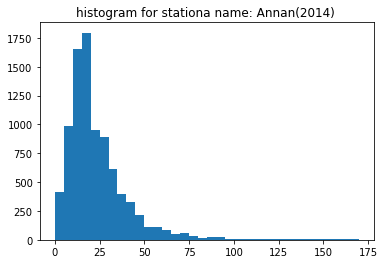

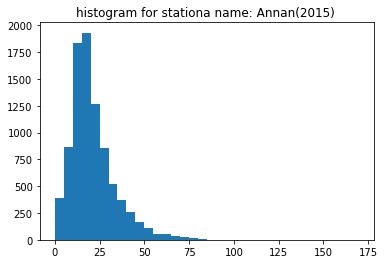

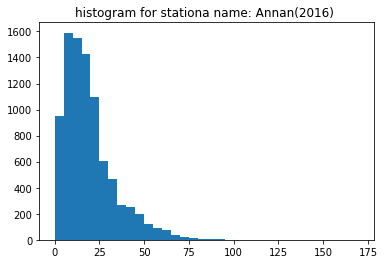

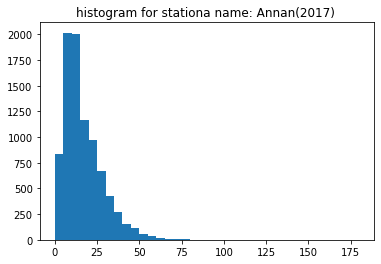

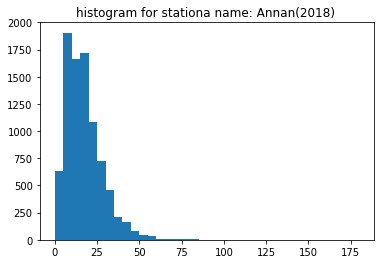

In [7]:
plt.hist(p, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170]) 
plt.title("histogram for stationa name: Annan(2014) ") 
plt.show()
plt.hist(q, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170]) 
plt.title("histogram for stationa name: Annan(2015) ") 
plt.show()
plt.hist(p1, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170]) 
plt.title("histogram for stationa name: Annan(2016) ") 
plt.show()
plt.hist(q1, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,180]) 
plt.title("histogram for stationa name: Annan(2017) ") 
plt.show()
plt.hist(p2, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,180]) 
plt.title("histogram for stationa name: Annan(2018) ") 
plt.show()

In [8]:
p.mean()

22.259625570776258

In [9]:
print(y4.mean())
print(y5.mean())
print(y6.mean())
print(y7.mean())
print(y8.mean())
print('minimum value')
print(y4.min())
print(y5.min())
print(y6.min())
print(y7.min())
print(y8.min())

417.14285714285717
418.2857142857143
418.2857142857143
417.14285714285717
417.14285714285717
minimum value
7
0
0
0
0


In [10]:
from time import sleep

print('Will it get printed immediately?', end='')
sleep(5)

Will it get printed immediately?

In [11]:
y4

array([ 418,  990, 1652, 1795,  950,  887,  611,  400,  324,  218,  114,
        107,   87,   46,   58,   33,   15,   21,   20,    7,    7],
      dtype=int64)

In [12]:
from scipy import stats
#rvs = stats.norm.rvs(loc = 5, scale = 10, size = (50,2))
print (stats.ttest_1samp(y4,25.0))
print (stats.ttest_1samp(y5,417.0))
print (stats.ttest_1samp(y6,418.0))
print (stats.ttest_1samp(y7,417))
print (stats.ttest_1samp(y8,417))


Ttest_1sampResult(statistic=3.3179896549281547, pvalue=0.003431664092336746)
Ttest_1sampResult(statistic=0.010591167755545618, pvalue=0.9916545654129001)
Ttest_1sampResult(statistic=0.0023535928345656404, pvalue=0.998145424373354)
Ttest_1sampResult(statistic=0.0010230459462152461, pvalue=0.9991938632967169)
Ttest_1sampResult(statistic=0.001029157781699295, pvalue=0.9991890473125421)


In [13]:
print('normaltest teststat = %6.3f pvalue = %6.4f' %
      stats.normaltest((y4-y4.mean())/y4.std()))

normaltest teststat =  9.845 pvalue = 0.0073


In [14]:
print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(y4))

normaltest teststat =  9.845 pvalue = 0.0073


In [15]:
print('normaltest teststat = %6.3f pvalue = %6.4f' %
      stats.normaltest((y4-y4.mean())/y4.std()))

normaltest teststat =  9.845 pvalue = 0.0073


In [16]:
d, pval = stats.kstest((y4-y4.mean())/y4.std(), 'norm')
print('KS-statistic D = %6.3f pvalue = %6.4f' % (d, pval))

KS-statistic D =  0.241 pvalue = 0.1484


In [17]:
print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_1samp(y4,417))

t-statistic =  0.001 pvalue = 0.9990


In [18]:
data = {
...     'a': [0.9, 1.0, 1.1, 1.2],
...     'b': [0.8, 0.9, 1.0, 1.1],
...     'c': [4.9, 5.0, 5.1, 5.2],
... }
from scipy.stats import f_oneway
t, p =  f_oneway(*data.values())
p

7.959305946158634e-12

In [19]:
np.random.seed(282629734)
x = stats.t.rvs(10, size=1000)
m, v, s, k = stats.t.stats(10, moments='mvsk')
n, (smin, smax), sm, sv, ss, sk = stats.describe(x)
sstr = '%-14s mean = %6.4f, variance = %6.4f, skew = %6.4f, kurtosis = %6.4f'
print(sstr % ('distribution:', m, v, s ,k))

print(sstr % ('sample:', sm, sv, ss, sk))
print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_1samp(x, m))
x.min()

distribution:  mean = 0.0000, variance = 1.2500, skew = 0.0000, kurtosis = 1.0000
sample:        mean = 0.0141, variance = 1.2903, skew = 0.2165, kurtosis = 1.0556
t-statistic =  0.391 pvalue = 0.6955


-3.7897557242248197

In [20]:
stats.describe(x)

DescribeResult(nobs=1000, minmax=(-3.7897557242248197, 5.263277329807165), mean=0.014061066398468422, variance=1.2902841462255106, skewness=0.21652778283120955, kurtosis=1.055594041706331)

In [21]:
print (stats.ttest_1samp(y4,4.0))


Ttest_1sampResult(statistic=3.495674346831411, pvalue=0.002277819738233034)


from math import log2
from math import sqrt
from numpy import asarray
 
# calculate the kl divergence
def kl_divergence(pr, qr):
	return sum(pr[i] * log2(pr[i]/qr[i]) for i in range(len(pr)))
pr=np.asarray(y4)
qr=np.asarray(y5)
def js_divergence(pr, qr):
	m = (0.5 * (pr + qr))
	return 0.5 * kl_divergence(pr, m) + (0.5 * kl_divergence(qr, m))
js_pq = js_divergence(pr, qr)
print('JS(P || Q) divergence: %.4f bits' % js_pq)
print('JS(P || Q) distance: %.3f' % sqrt(js_pq))

In [22]:
from scipy.spatial.distance import jensenshannon
from numpy import asarray
from scipy import stats


In [23]:
a=df14['SiteEngName'].unique()
opv=[]
for i in range(18):
    a1=(df4[df14.SiteEngName==a[i]])
    a2=(df5[df15.SiteEngName==a[i]])
    a3=(df6[df16.SiteEngName==a[i]])
    a4=(df7[df17.SiteEngName==a[i]])
    a5=(df8[df18.SiteEngName==a[i]])
    b1=a1.PM
    b2=a2.PM
    b3=a3.PM
    b4=a4.PM
    b5=a5.PM
    print('==============')
    print(a[i])
    counts, bin_edges = np.histogram(b1,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y4=counts
    print(y4)
    counts, bin_edges = np.histogram(b2,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y5=counts
    print(y5)
    counts, bin_edges = np.histogram(b3,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y6=counts
    print(y6)
    counts, bin_edges = np.histogram(b4,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y7=counts
    print(y7)
    counts, bin_edges = np.histogram(b5,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y8=counts
    print(y8)
    print('=============')
    ye45=jensenshannon(y4,y5)
    ye46=jensenshannon(y4,y6)
    ye47=jensenshannon(y4,y7)
    ye48=jensenshannon(y4,y8)
    ye56=jensenshannon(y5,y6)
    ye57=jensenshannon(y5,y7)
    ye58=jensenshannon(y5,y8)
    ye67=jensenshannon(y6,y7)
    ye68=jensenshannon(y6,y8)
    ye78=jensenshannon(y7,y8)
    je=np.array([ye45,ye46,ye47,ye48,ye56,ye57,ye58,ye67,ye68,ye78])
    print(je)
    print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(je))
    k2, op=stats.normaltest(je)
    print(op)
    opv.append(op)
    #a5.nlargest(20,['PM'])
    
    #print(js_divergence(ab4,ab5))
    #print(js_divergence(ab5,ab4))
    #print(js_divergence(y5,y6))
    #print(js_divergence(y6,y5))
    #print(js_divergence(y6,y7))
   # print(js_divergence(y7,y6))
   # print(js_divergence(y7,y8))
   # print(js_divergence(y8,y7))
    
    

Banqiao
[ 418  990 1652 1795  950  887  611  400  324  218  114  107   87   46
   58   33   15   21   20    7    7]
[ 393  868 1834 1932 1265  855  516  369  257  165  113   54   53   38
   25   16    4    2    1    0    0]
[ 950 1590 1550 1424 1100  604  470  271  249  200  125   88   78   39
   22   10    4    5    4    1    0]
[ 832 2016 2008 1164  976  670  429  272  152  114   54   38   14   12
    5    3    1    0    0    0    0]
[ 629 1905 1663 1721 1084  727  456  213  165   85   42   37    3   11
    7    7    4    1    0    0    0]
[0.07652382 0.130262   0.18194856 0.15927364 0.13610092 0.17255488
 0.14260695 0.09967608 0.10626174 0.07695153]
normaltest teststat =  1.124 pvalue = 0.5699
0.5699325962823711
Cailiao
[  42  400 1224 1876 1396 1326  865  441  394  207  191  133   79   62
   43   29   22   10    4    7    9]
[1743 1943 1482 1101  576  475  447  303  254  156  114   60   46   24
   19    7    7    1    1    1    0]
[ 286 1867 2233 1724 1147  585  335  225  166  113 

C:\Users\Khalid\anaconda3\envs\pytorch\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Linkou
[ 105  496 1350 1487 1413 1006  959  625  440  280  173  142   80   56
   50   25   23   13    7   10   20]
[ 496 1152 1899 1508 1182  702  564  339  275  223  128   98   56   55
   35   27   12    4    5    0    0]
[ 209 1222 2087 1881 1004  803  566  377  212  170   95   67   46   22
   11    7    4    1    0    0    0]
[ 324 1116 1850 1792 1326  697  506  349  257  194  144   61   57   28
   23   18    6    5    2    2    3]
[1151 1769 1520 1180 1499  981  229  165  118   78   38   19    8    5
    0    0    0    0    0    0    0]
[0.17062751 0.17816432 0.16130961 0.31315116 0.08870215 0.0559138
 0.18692741 0.0639156  0.21407402 0.19753631]
normaltest teststat =  0.408 pvalue = 0.8156
0.8156357030095018
Sanchong
[ 353  738 1204 1535 1279 1007  940  542  396  230  167  145   88   35
   31   16   14    2    8    9   21]
[1525 1755 1455 1287  984  531  413  305  164  126   61   49   38   20
   21   17    2    5    2    0    0]
[ 820 1597 1628 1633  973  799  456  287  228  124  

Yangming
[2010 2062 1367 1275  682  592  349  162   94   53   39   19   18   10
   12    8    2    3    1    1    1]
[2370 1972 1717  954  735  392  314  139   56   37   24   20    9   13
    7    1    0    0    0    0    0]
[3237 1669 1621  805  538  356  210  108   94   50   47   16   10    3
    0    1    1    0    0    0    0]
[3223 1637 1323 1098  551  430  204  128  110   29   15    9    1    2
    0    0    0    0    0    0    0]
[3398 1699 1564  891  721  271  135   42   30    8    1    0    0    0
    0    0    0    0    0    0    0]
[0.0760477  0.13309306 0.12123801 0.16856905 0.08774307 0.09674092
 0.11803245 0.05912166 0.08656584 0.08597223]
normaltest teststat =  1.822 pvalue = 0.4021
0.4020619713356102
Yonghe
[ 138 1157 1803 1831 1092 1004  633  420  211  165   82   61   41   46
   21   14   11    8   13    3    6]
[ 685 1731 1587 1484 1167  707  447  333  233  121   78   72   34   23
   21    7    5   14    6    2    3]
[1251 1735 1989 1281  957  451  405  240  229   71 

In [24]:
import pandas as pd 
import numpy as np 
  
# creating the Numpy array 
array = np.array([[1, 1, 1], [2, 4, 8], [3, 9, 27],  
                  [4, 16, 64], [5, 25, 125], [6, 36, 216],  
                  [7, 49, 343]]) 
  
# creating a list of index names 
index_values = ['first', 'second', 'third', 
                'fourth', 'fifth', 'sixth', 'seventh'] 
   
# creating a list of column names 
column_values = ['number', 'squares', 'cubes'] 
  
# creating the dataframe 
df = pd.DataFrame(data = array,  
                  index = index_values,  
                  columns = column_values) 
  
# displaying the dataframe 
print(df) 

         number  squares  cubes
first         1        1      1
second        2        4      8
third         3        9     27
fourth        4       16     64
fifth         5       25    125
sixth         6       36    216
seventh       7       49    343


In [25]:
p

7.959305946158634e-12

In [26]:
 import scipy.stats as stats

#perform Chi-Square Goodness of Fit Test
stats.chisquare(f_obs=y4, f_exp=y5)

C:\Users\Khalid\anaconda3\envs\pytorch\lib\site-packages\scipy\stats\stats.py:6125: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp


Power_divergenceResult(statistic=inf, pvalue=0.0)

In [27]:
 import scipy.stats as stats

#perform Chi-Square Goodness of Fit Test
stats.chisquare(f_obs=y5, f_exp=y4)

Power_divergenceResult(statistic=1944.975554714565, pvalue=0.0)

In [28]:
opv

[0.5699325962823711,
 0.31558932171814835,
 0.9388376579565709,
 0.8189747945749717,
 0.8156357030095018,
 0.34977452551882965,
 0.7813930455045675,
 0.040234113288006364,
 0.8037792761157498,
 0.486886090043013,
 0.3679822666821343,
 0.5858682758183493,
 0.3092763472357392,
 0.5145516314941357,
 0.5779361169181092,
 0.4020619713356102,
 0.27720191840523684,
 0.7591567235324999]

In [29]:
column_values=['Pvalue'] 
df = pd.DataFrame(data = opv,  
                  index = a,  
                  columns = column_values) 
  
# displaying the dataframe 
print(df) 

             Pvalue
Banqiao    0.569933
Cailiao    0.315589
Datong     0.938838
Guting     0.818975
Linkou     0.815636
Sanchong   0.349775
Shilin     0.781393
Songshan   0.040234
Tamsui     0.803779
Tucheng    0.486886
Wanhua     0.367982
Wanli      0.585868
Xindian    0.309276
Xinzhuang  0.514552
Xizhi      0.577936
Yangming   0.402062
Yonghe     0.277202
Zhongshan  0.759157


In [30]:
df.nlargest(18, ['Pvalue']) 

,Pvalue
Datong,0.938838
Guting,0.818975
Linkou,0.815636
Tamsui,0.803779
Shilin,0.781393
Zhongshan,0.759157
Wanli,0.585868
Xizhi,0.577936
Banqiao,0.569933
Xinzhuang,0.514552


In [31]:
df.nlargest(5, ['Pvalue'])

,Pvalue
Datong,0.938838
Guting,0.818975
Linkou,0.815636
Tamsui,0.803779
Shilin,0.781393


In [32]:
df.nsmallest(5, ['Pvalue'])

,Pvalue
Songshan,0.040234
Yonghe,0.277202
Xindian,0.309276
Cailiao,0.315589
Sanchong,0.349775


In [33]:
f,ax=plt.subplots(1,2,figsize=(14,6))
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4.0,'color':'teal' ,'label':'Year-14',},name="x variable"
             ax=ax[0])

SyntaxError: invalid syntax (<ipython-input-33-2a892feea02d>, line 5)

In [34]:
b1=(df4[df14.SiteEngName==a[i]].PM)
b1

17        40.0
35        35.0
53        35.0
71        25.0
89        29.0
          ... 
157607    22.0
157625    26.0
157643    25.0
157661    38.0
157679    42.0
Name: PM, Length: 8760, dtype: float64

In [38]:
b1

0         26.00
18        28.00
36        30.00
54        29.00
72        28.00
          ...  
157590    23.54
157608    24.58
157626    30.13
157644    41.21
157662    56.92
Name: PM, Length: 8760, dtype: float64

In [63]:
b1

17        72.0
35        78.0
53        74.0
71        63.0
89        51.0
          ... 
157607    72.0
157625    79.0
157643    71.0
157661    76.0
157679    76.0
Name: PM, Length: 8760, dtype: float64

C:\Users\Khalid\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

C:\Users\Khalid\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

C:\Users\Khalid\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

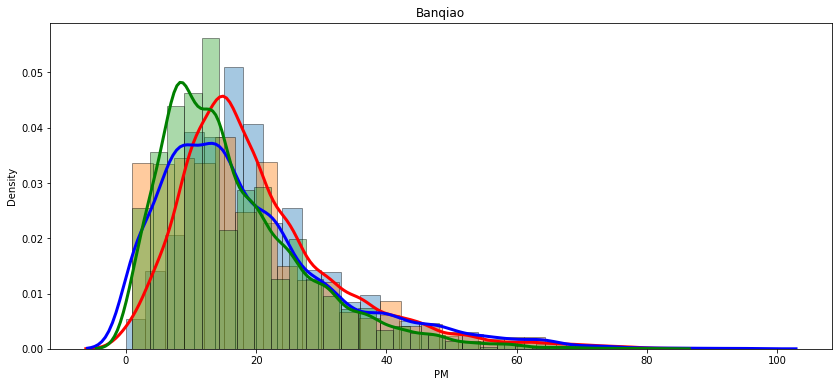

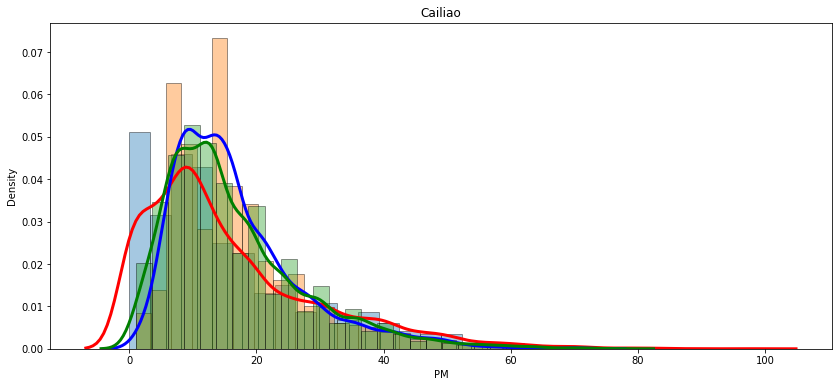

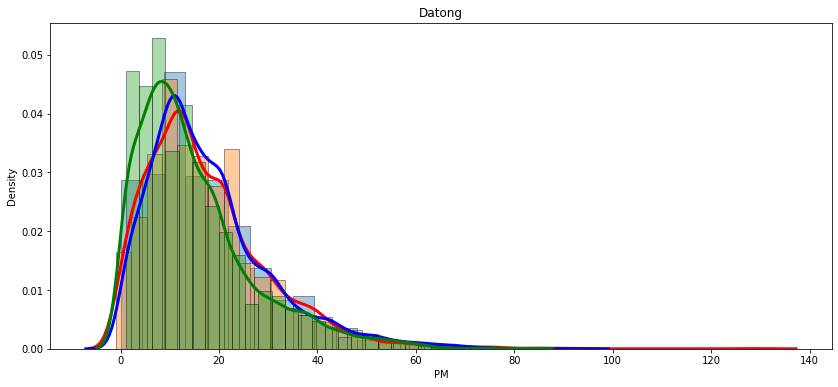

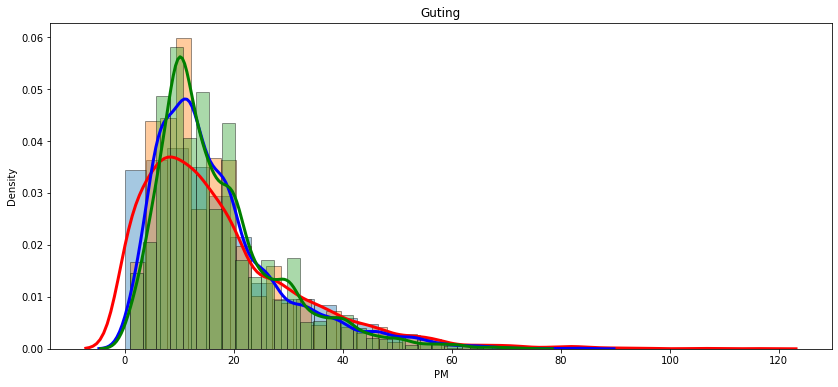

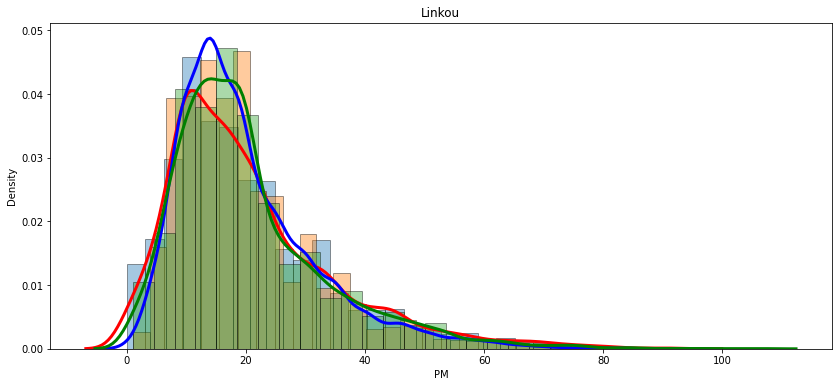

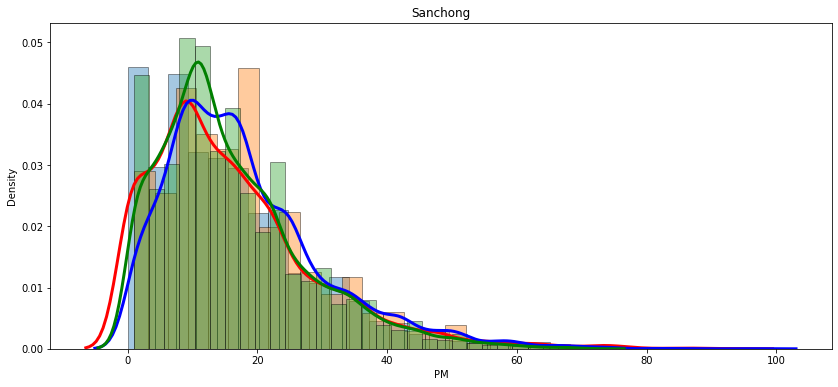

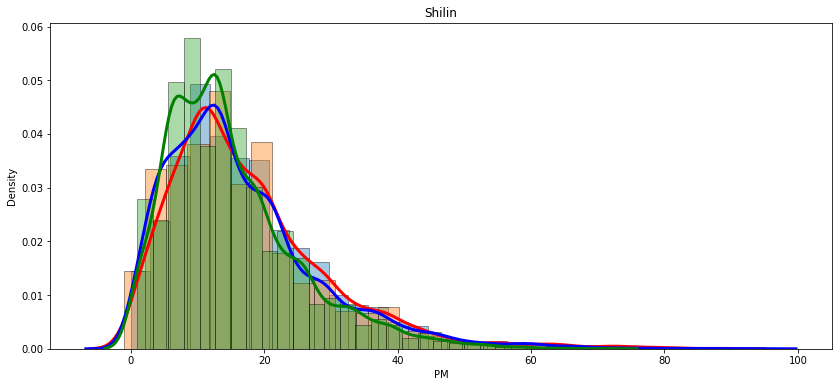

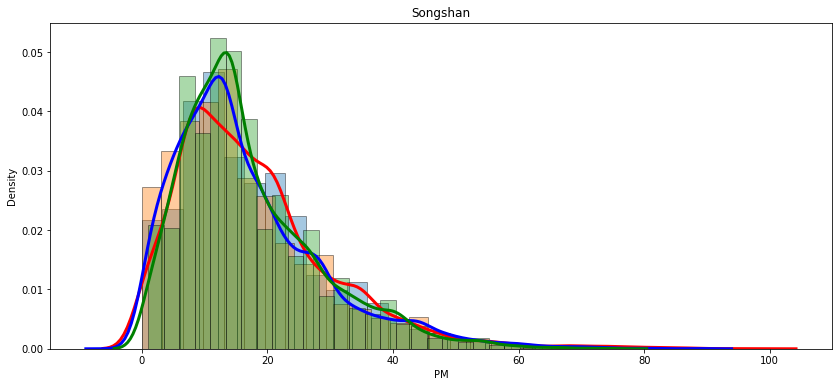

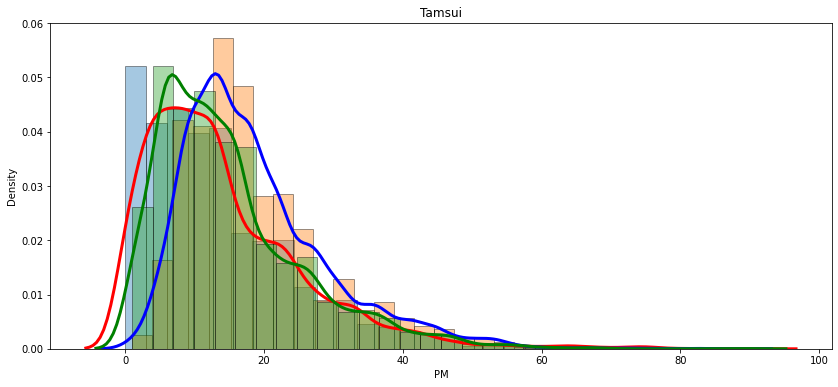

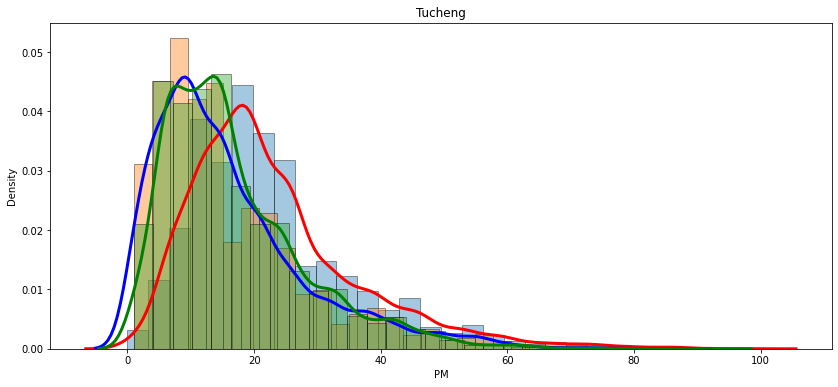

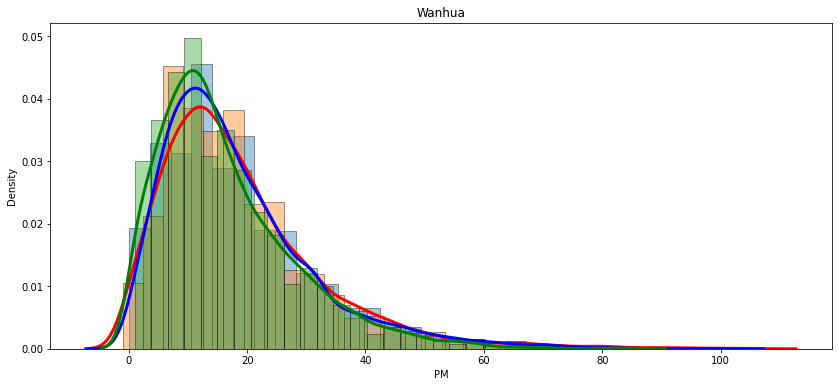

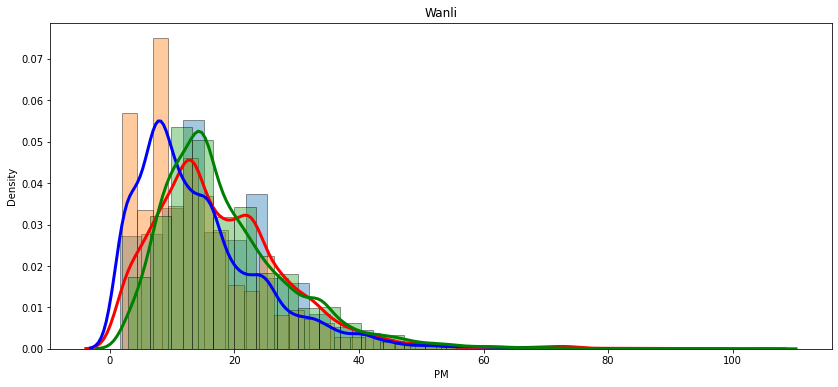

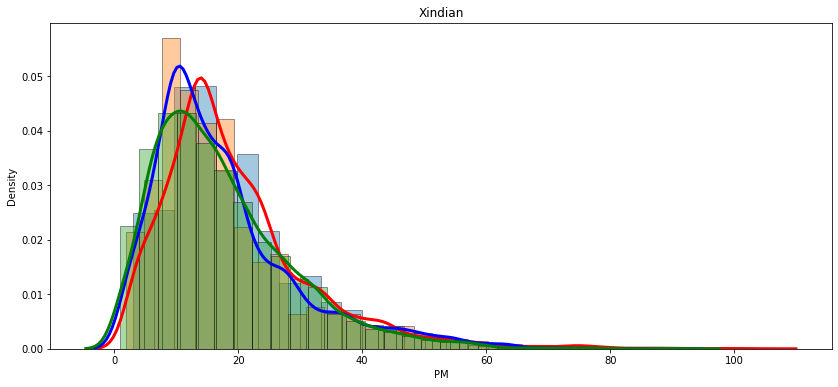

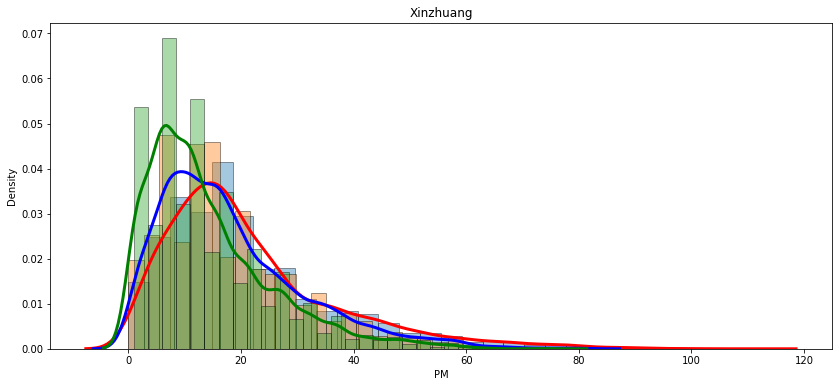

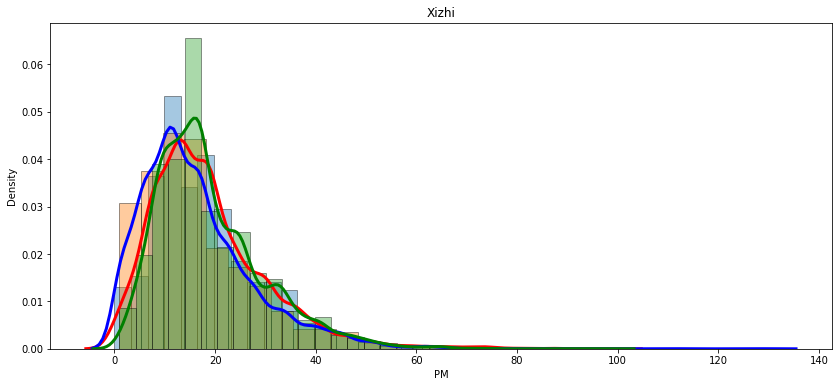

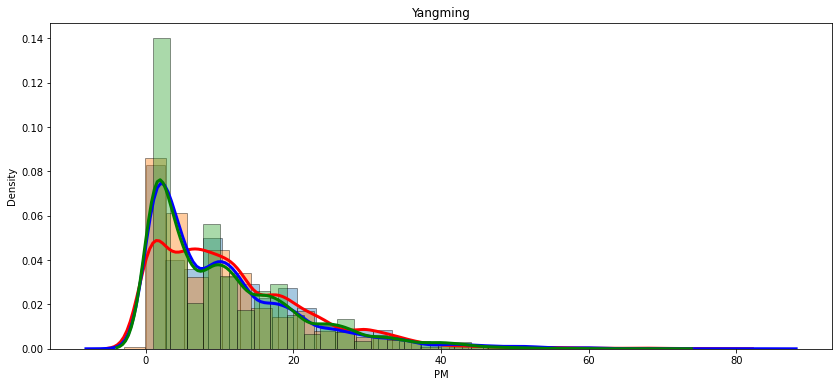

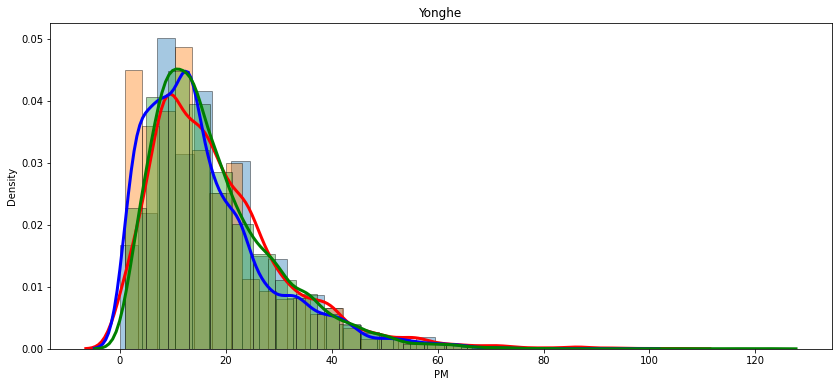

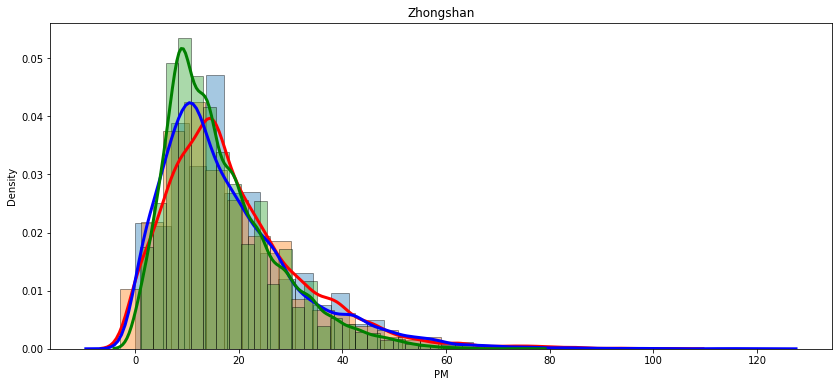

In [38]:
for i in range(18):
    f,ax=plt.subplots(figsize=(14,6))
    plt.title('a[i]')
  #  print(a[i])
    b1=(df5[df15.SiteEngName==a[i]].PM)
    b2=(df6[df16.SiteEngName==a[i]].PM)
    b3=(df7[df17.SiteEngName==a[i]].PM)

    plt.title(a[i])

   # b1=a[i]
    plt.title(a[i])
    sns.distplot(b1,
             kde=True,hist=True,bins=30,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax)
  #  print(a[i])

    plt.title(a[i])
    sns.distplot(b2,kde=True,hist=True,bins=30,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax)
    plt.title(a[i])
    sns.distplot(b3,kde=True,hist=True,bins=30,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-15',},
             ax=ax)

In [36]:
b1

17        72.0
35        78.0
53        74.0
71        63.0
89        51.0
          ... 
157607    72.0
157625    79.0
157643    71.0
157661    76.0
157679    76.0
Name: PM, Length: 8760, dtype: float64

In [ ]:
for i range(18):
    f,ax=plt.subplots(1,2,figsize=(14,6))
    plt.title('Dongshan')
    sns.distplot(df14[df14['SiteEngName']=='a'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Dongshan')     
sns.distplot(df15[df15['SiteEngName']=='Banqiao'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Banqiao'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Banqiao'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Banqiao'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
plt.title('Dongshan')     
sns.distplot(df18[df18['SiteEngName']=='Banqiao'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Banqiao'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:title={'center':'Dongshan'}, xlabel='PM', ylabel='Density'>

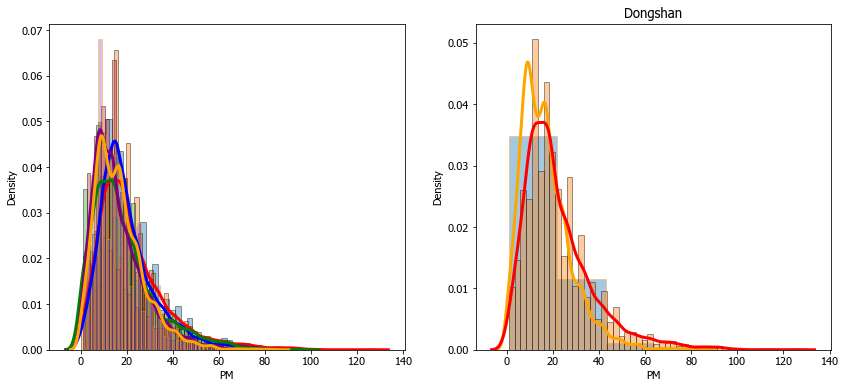

In [20]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('Dongshan')
sns.distplot(df14[df14['SiteEngName']=='Banqiao'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Dongshan')     
sns.distplot(df15[df15['SiteEngName']=='Banqiao'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Banqiao'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Banqiao'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Banqiao'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
plt.title('Dongshan')     
sns.distplot(df18[df18['SiteEngName']=='Banqiao'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Banqiao'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


<AxesSubplot:title={'center':'Shanhua'}, xlabel='PM'>

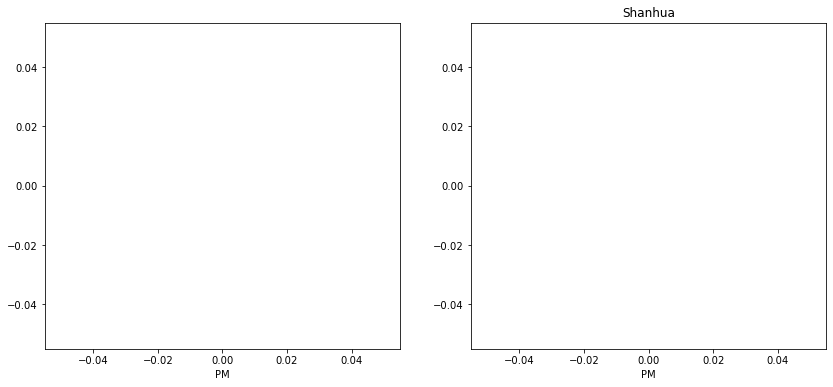

In [61]:
#plt.title('Shanhua')
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('Shanhua')
sns.distplot(df14[df14['SiteEngName']=='Shanhua'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
#plt.title('Shanhua',ax=ax[0])    
sns.distplot(df15[df15['SiteEngName']=='Shanhua'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Shanhua'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Shanhua'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Shanhua'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
#plt.title('Dongshan')     
sns.distplot(df18[df18['SiteEngName']=='Shanhua'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Shanhua'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


<AxesSubplot:title={'center':'Xinying'}, xlabel='PM'>

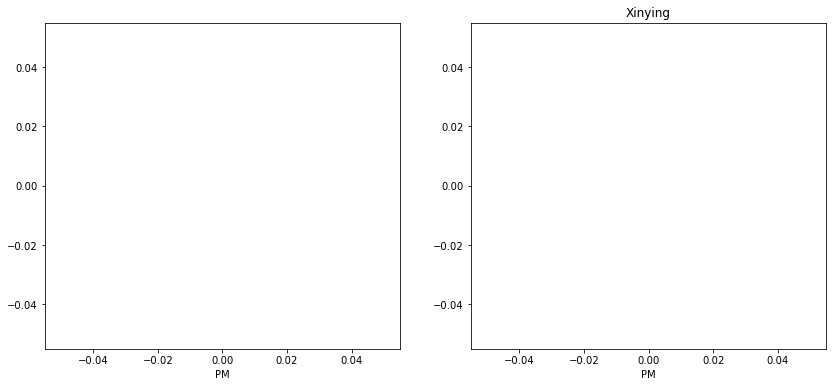

In [62]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Xinying'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Xinying')     
sns.distplot(df15[df15['SiteEngName']=='Xinying'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Xinying'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Xinying'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Xinying'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Xinying'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Xinying'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])

<AxesSubplot:title={'center':'Puli'}, xlabel='PM'>

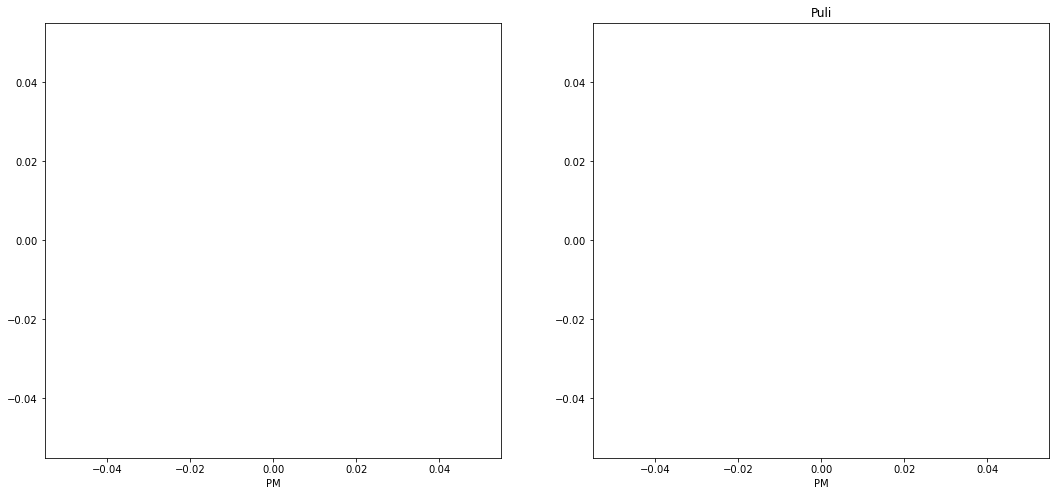

In [63]:
f,ax=plt.subplots(1,2,figsize=(18,8))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Puli'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Puli')     
sns.distplot(df15[df15['SiteEngName']=='Puli'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Puli'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Puli'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Puli'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Puli'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Puli'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])

C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:title={'center':'Datong'}, xlabel='PM', ylabel='Density'>

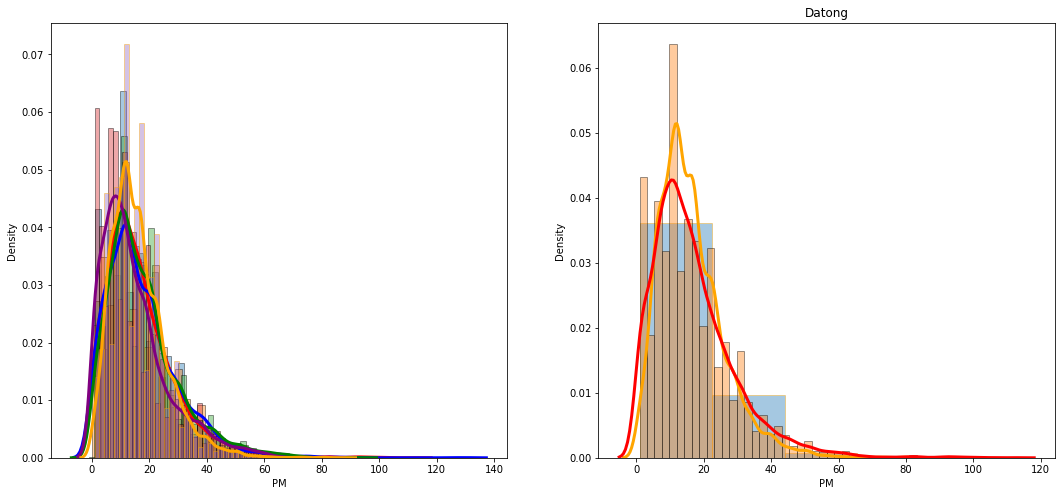

In [64]:
f,ax=plt.subplots(1,2,figsize=(18,8))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Datong')     
sns.distplot(df15[df15['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])

C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:title={'center':'Datong'}, xlabel='PM', ylabel='Density'>

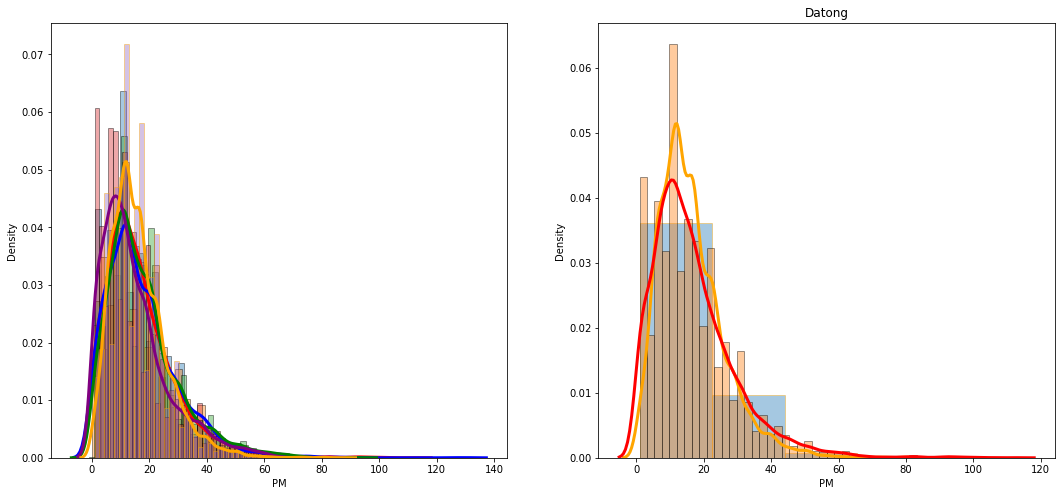

In [65]:
f,ax=plt.subplots(1,2,figsize=(18,8))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Datong')     
sns.distplot(df15[df15['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])

In [66]:
#"Chiayi	0.037214
#Songshan	0.040234
#Fengyuan	0.043167
#Xingang	0.076680
#Sanyi	0.176619"

C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Khalid\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Khalid\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<AxesSubplot:title={'center':'Chiayi'}, xlabel='PM'>

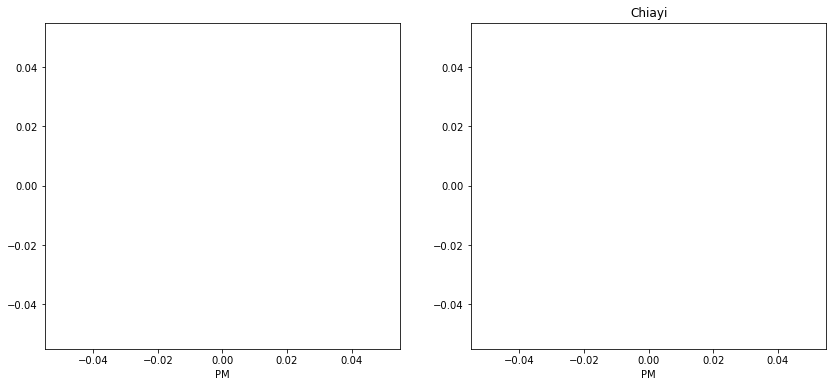

In [67]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Chiayi')     
sns.distplot(df15[df15['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Chiayi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:title={'center':'Songshan'}, xlabel='PM', ylabel='Density'>

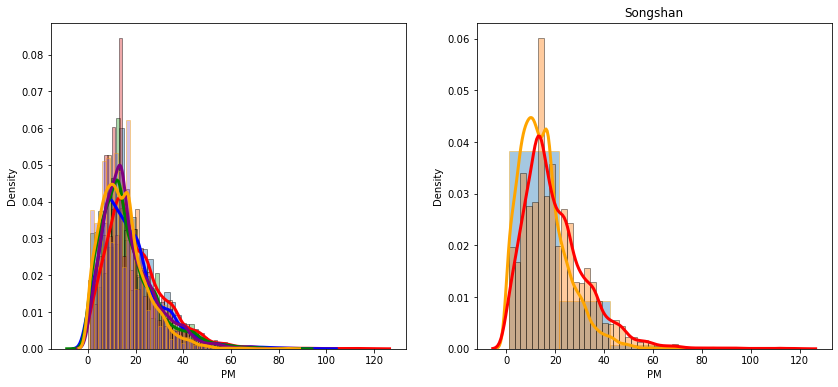

In [68]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Songshan')     
sns.distplot(df15[df15['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Khalid\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Khalid\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<AxesSubplot:title={'center':'Fengyuan'}, xlabel='PM'>

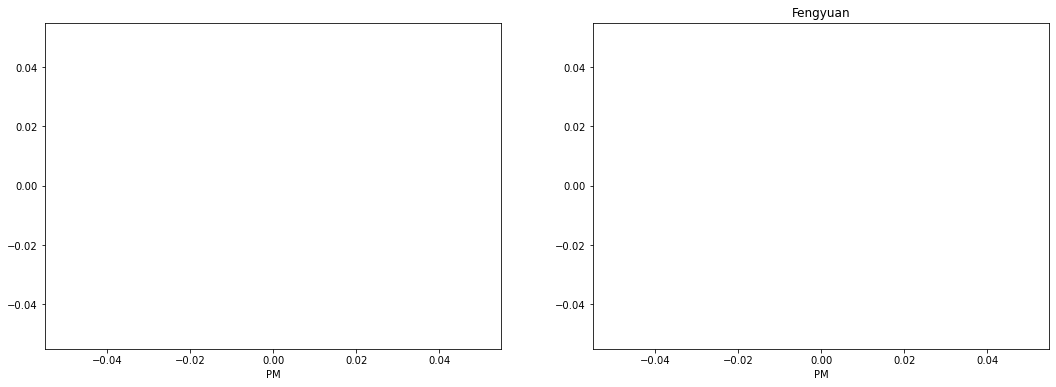

In [69]:
f,ax=plt.subplots(1,2,figsize=(18,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Fengyuan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Fengyuan')     
sns.distplot(df15[df15['SiteEngName']=='Fengyuan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Fengyuan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Fengyuan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Fengyuan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Fengyuan'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Fengyuan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


<AxesSubplot:title={'center':'Xingang'}, xlabel='PM'>

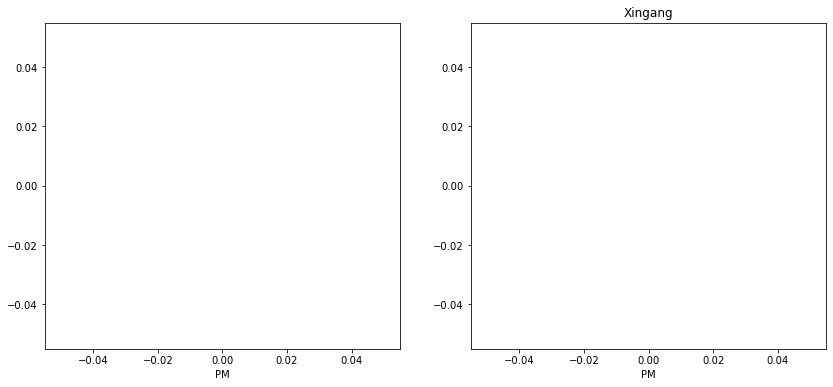

In [70]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Xingang'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Xingang')     
sns.distplot(df15[df15['SiteEngName']=='Xingang'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Xingang'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Xingang'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Xingang'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Xingang'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Xingang'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


<AxesSubplot:title={'center':'Sanyi'}, xlabel='PM'>

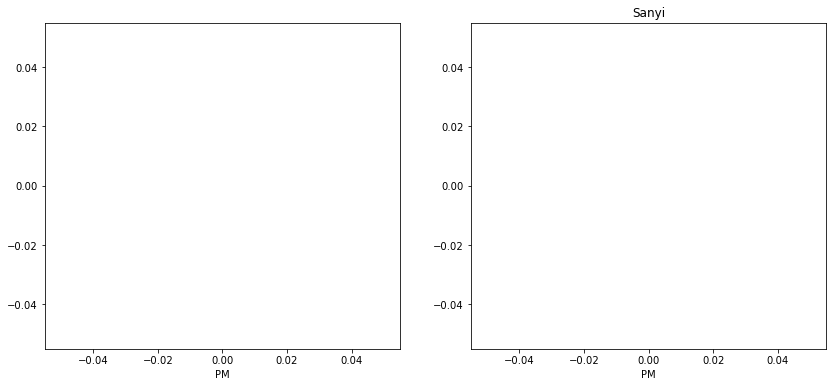

In [71]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Sanyi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Sanyi')     
sns.distplot(df15[df15['SiteEngName']=='Sanyi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Sanyi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Sanyi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Sanyi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Sanyi'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Sanyi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


<AxesSubplot:xlabel='PM'>

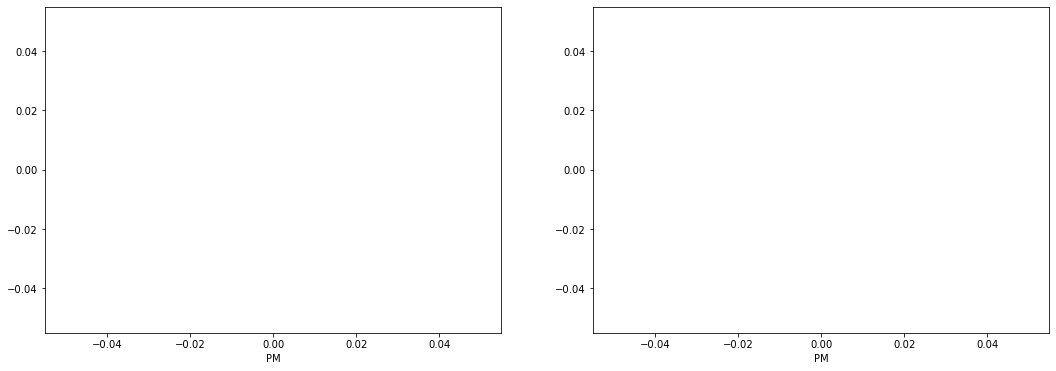

In [72]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(df14[df14['SiteEngName']=='Xinying'].PM,ax=ax[0])
sns.distplot(df15[df15['SiteEngName']=='Xinying'].PM,ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Xinying'].PM,ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Xinying'].PM,ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Xinying'].PM,ax=ax[0])

sns.distplot(df14[df14['SiteEngName']=='Xinying'].PM,ax=ax[1])
sns.distplot(df17[df17['SiteEngName']=='Xinying'].PM,ax=ax[1])
sns.distplot(df18[df18['SiteEngName']=='Xinying'].PM,ax=ax[1])


<AxesSubplot:xlabel='PM'>

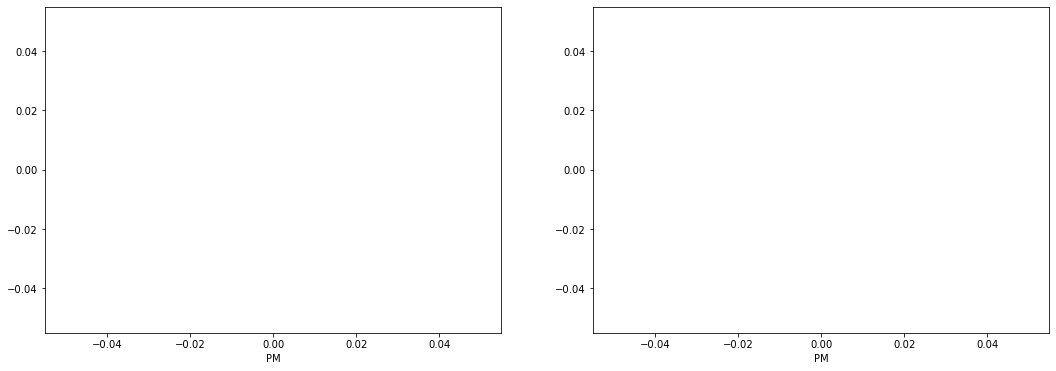

In [73]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,
             kde=True,hist=True,bins=100,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
            
sns.distplot(df15[df15['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Chiayi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,ax=ax[1])
sns.distplot(df17[df17['SiteEngName']=='Chiayi'].PM,ax=ax[1])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,ax=ax[1])

C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:title={'center':'PM2.5 and DIR'}, xlabel='PM', ylabel='Density'>

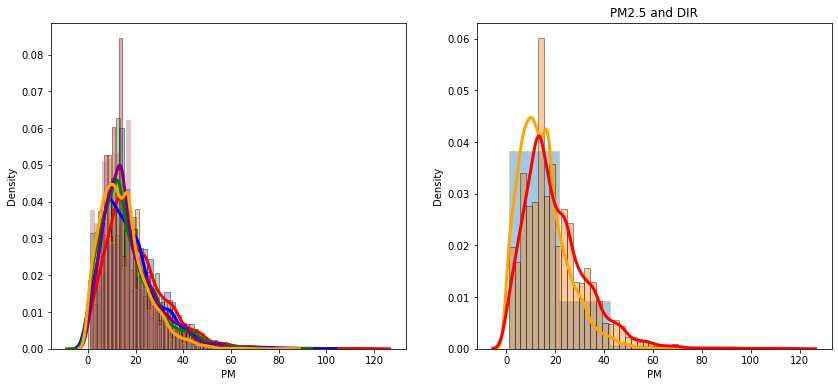

In [74]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('PM2.5 and DIR')     
sns.distplot(df15[df15['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:xlabel='PM', ylabel='Density'>

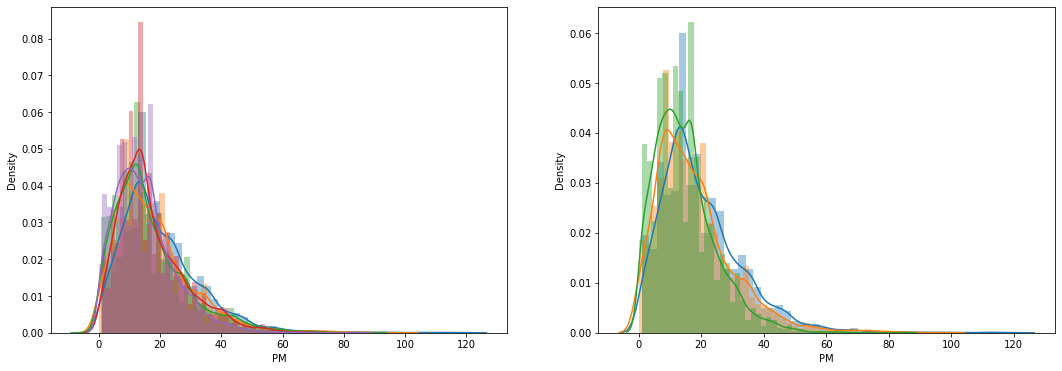

In [75]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,ax=ax[0])
sns.distplot(df15[df15['SiteEngName']=='Songshan'].PM,ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Songshan'].PM,ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Songshan'].PM,ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,ax=ax[0])

sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,ax=ax[1])
sns.distplot(df15[df15['SiteEngName']=='Songshan'].PM,ax=ax[1])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,ax=ax[1])

C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Khalid\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Khalid\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<AxesSubplot:xlabel='PM'>

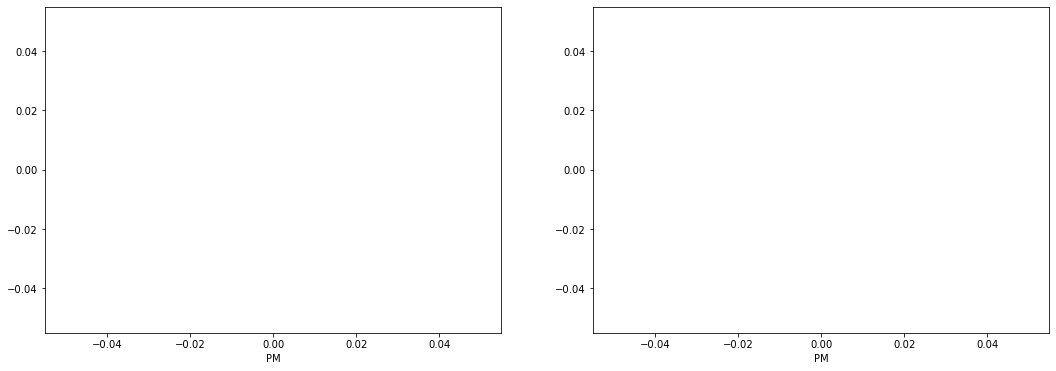

In [76]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,ax=ax[0])
sns.distplot(df15[df15['SiteEngName']=='Chiayi'].PM,ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Chiayi'].PM,ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Chiayi'].PM,ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,ax=ax[0])

sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,ax=ax[1])
sns.distplot(df15[df15['SiteEngName']=='Chiayi'].PM,ax=ax[1])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,ax=ax[1])

<AxesSubplot:xlabel='PM'>

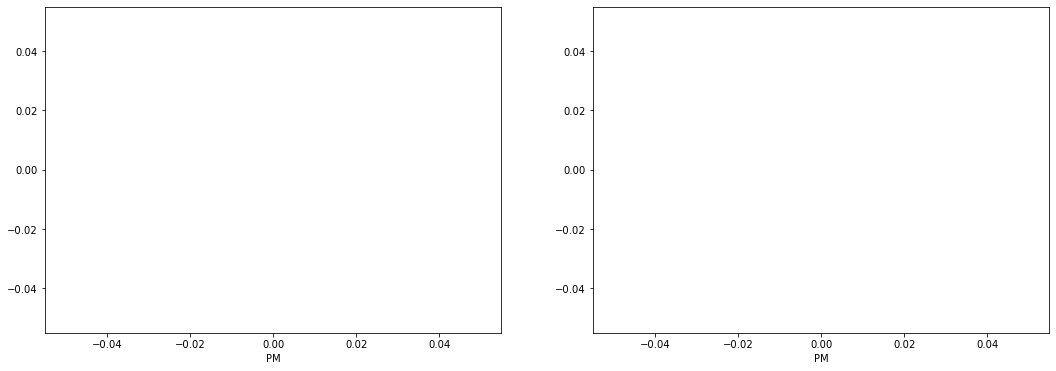

In [77]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(df14[df14['SiteEngName']=='Fengyuan'].PM,ax=ax[0])
sns.distplot(df15[df15['SiteEngName']=='Fengyuan'].PM,ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Fengyuan'].PM,ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Fengyuan'].PM,ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Fengyuan'].PM,ax=ax[0])

sns.distplot(df14[df14['SiteEngName']=='Fengyuan'].PM,ax=ax[1])
sns.distplot(df15[df15['SiteEngName']=='Fengyuan'].PM,ax=ax[1])
sns.distplot(df18[df18['SiteEngName']=='Fengyuan'].PM,ax=ax[1])

In [78]:
MAX = 100000
  
def Print3Smallest(arr, n): 
    firstmin = MAX
    secmin = MAX
    thirdmin = MAX
  
    for i in range(0, n): 
          
        # Check if current element 
        # is less than firstmin,  
        # then update first,second 
        # and third 
  
        if arr[i] < firstmin: 
            thirdmin = secmin 
            secmin = firstmin 
            firstmin = arr[i] 
  
        # Check if current element is 
        # less than secmin then update 
        # second and third 
        elif arr[i] < secmin: 
            thirdmin = secmin 
            secmin = arr[i] 
  
        # Check if current element is 
        # less than,then upadte third 
        elif arr[i] < thirdmin: 
            thirdmin = arr[i] 
  
    print("First min = ", firstmin) 
    print("Second min = ", secmin) 
    print("Third min = ", thirdmin) 
  
  
# driver program 
arr = opv
n = len(arr) 
Print3Smallest(arr, n) 

First min =  0.04023411328800657
Second min =  0.2772019184052368
Third min =  0.3092763472357392


In [79]:
import sys 
  
# Function to print largest element in 
# first half and second half of an array 
def findMax(arr, n) : 
  
    # To store the maximum element 
    # in the first half 
    maxFirst = -sys.maxsize - 1
  
    # Middle index of the array 
    mid = n // 2; 
  
    # Calculate the maximum element 
    # in the first half 
    for i in range(0, mid): 
        maxFirst = max(maxFirst, arr[i]) 
  
    # If the size of array is odd then 
    # the middle element will be included 
    # in both the halves 
    if (n % 2 == 1): 
        maxFirst = max(maxFirst, arr[mid]) 
  
    # To store the maximum element 
    # in the second half 
    maxSecond = -sys.maxsize - 1
  
    # Calculate the maximum element 
    # int the second half 
    for i in range(mid, n): 
        maxSecond = max(maxSecond, arr[i]) 
  
    # Print the found maximums 
    print(maxFirst, ",", maxSecond) 
  
# Driver code 
arr = opv
n = len(arr) 
  
findMax(arr, n) 

0.9388376579565709 , 0.7591567235324999


In [80]:
opv

[0.5699325962823711,
 0.31558932171814835,
 0.9388376579565709,
 0.8189747945749717,
 0.8156357030095018,
 0.34977452551882965,
 0.7813930455045675,
 0.04023411328800657,
 0.8037792761157498,
 0.486886090043013,
 0.3679822666821343,
 0.5858682758183493,
 0.3092763472357392,
 0.5145516314941357,
 0.5779361169181092,
 0.4020619713356102,
 0.2772019184052368,
 0.7591567235324999]

In [81]:
np.concatenate([a,opv])

array(['Banqiao', 'Cailiao', 'Datong', 'Guting', 'Linkou', 'Sanchong',
       'Shilin', 'Songshan', 'Tamsui', 'Tucheng', 'Wanhua', 'Wanli',
       'Xindian', 'Xinzhuang', 'Xizhi', 'Yangming', 'Yonghe', 'Zhongshan',
       0.5699325962823711, 0.31558932171814835, 0.9388376579565709,
       0.8189747945749717, 0.8156357030095018, 0.34977452551882965,
       0.7813930455045675, 0.04023411328800657, 0.8037792761157498,
       0.486886090043013, 0.3679822666821343, 0.5858682758183493,
       0.3092763472357392, 0.5145516314941357, 0.5779361169181092,
       0.4020619713356102, 0.2772019184052368, 0.7591567235324999],
      dtype=object)

In [82]:
import heapq
import numpy
a = numpy.array([1, 3, 2, 4, 5])
heapq.nlargest(3, range(len(a)), a.take)


[4, 3, 1]

In [83]:
a

array([1, 3, 2, 4, 5])

In [84]:

ak = numpy.array(opv)
heapq.nlargest(10, range(len(a)), a.take)

[4, 3, 1, 2, 0]

In [85]:
print(js_divergence(y4,y5))
print(js_divergence(y5,y4))
print(js_divergence(y5,y6))
print(js_divergence(y6,y5))
print(js_divergence(y6,y7))
print(js_divergence(y7,y6))
print(js_divergence(y7,y8))
print(js_divergence(y8,y7))

ValueError: math domain error

In [ ]:
a=df14['SiteEngName'].unique()
for i in range(76):
    a1=(df4[df14.SiteEngName==a[i]])
    a2=(df5[df15.SiteEngName==a[i]])
    a3=(df6[df16.SiteEngName==a[i]])
    a4=(df7[df17.SiteEngName==a[i]])
    a5=(df8[df18.SiteEngName==a[i]])
    b1=a1.PM
    b2=a2.PM
    b3=a3.PM
    b4=a4.PM
    b5=a5.PM
    print(a[i])
    counts, bin_edges = np.histogram(b1,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
    ab4=counts
    print(ab4)
    counts, bin_edges = np.histogram(b2,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
    ab5=counts
    print(ab5)
    counts, bin_edges = np.histogram(b3,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
    ab6=counts
    print(ab6)
    counts, bin_edges = np.histogram(b4,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
    ab7=counts
    print(ab7)
    counts, bin_edges = np.histogram(b5,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
    ab8=counts
    print(ab8)
    print('=============')
    print(js_divergence(ab4,ab5))
    print(js_divergence(ab5,ab4))
    #print(js_divergence(y5,y6))
    #print(js_divergence(y6,y5))
    #print(js_divergence(y6,y7))
   # print(js_divergence(y7,y6))
   # print(js_divergence(y7,y8))
   # print(js_divergence(y8,y7))

    

In [ ]:
a=df14['SiteEngName'].unique()
for i range(76):
    a1=(df4[df14.SiteEngName==a[i]])
    a2=(df5[df15.SiteEngName==a[i]])
    a3=(df6[df16.SiteEngName==a[i]])
    a4=(df7[df17.SiteEngName==a[i]])
    a5=(df8[df18.SiteEngName==a[i]])
    y4=a1.PM
    y5=a2.PM
    y6=a3.PM
    y7=a4.PM
    y8=a5.PM
    print(a[i])
    print(========)
    print()


    

In [ ]:
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm
# define the distribution parameters
sample_space = arange(0, 166, 0.1)
mean = 29.5
stdev = 21.06
# calculate the pdf
pdf = norm.pdf(sample_space, mean, stdev)
# plot
a=pdf
pyplot.plot(sample_space, pdf)
pyplot.show()

In [ ]:
print(pdf)

In [ ]:
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm
# define the distribution parameters
sample_space = arange(0, 166, 0.1)
mean = 24.24
stdev = 18.27
# calculate the pdf
pdf = norm.pdf(sample_space, mean, stdev)
# plot
b=pdf
pyplot.plot(sample_space, pdf)
pyplot.show()

In [ ]:
import numpy as np

def KL(a, b):
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))


#values1 = p
#values2 = q
print(KL(a,b))

In [ ]:
print(KL(b,a))

In [ ]:
r.PM

In [ ]:
qw=r.PM[((r.PM)>50) & ((r.PM)<100)].std()

In [ ]:
qw

In [ ]:
qw=r.PM[((r.PM)>50) & ((r.PM)<100)]

In [ ]:
qw.count()

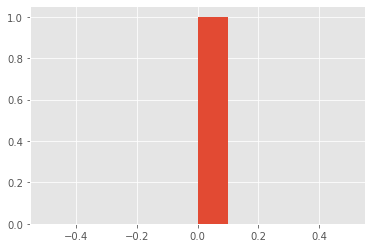

In [86]:
plt.style.use('ggplot')
plt.hist(p, bins=10)
plt.show()

In [87]:
from scipy.spatial.distance import jensenshannon
from numpy import asarray

In [88]:
def js_div(pr, qr):
	m = (0.5 * (pr + qr))
	return ((0.5 * KL(pr, m)) + (0.5 * KL(qr, m)))
js_pq = js_div(pr, qr)


NameError: name 'KL' is not defined

In [89]:
js_div(pr, qr)

NameError: name 'KL' is not defined

In [90]:
print(KL(y4,y5))

NameError: name 'KL' is not defined

In [91]:
print(KL(y4,y5))
print(KL(y5,y4))
print(KL(y5,y6))
print(KL(y6,y5))
print(KL(y6,y7))
print(KL(y7,y6))
print(KL(y7,y8))
print(KL(y8,y7))

NameError: name 'KL' is not defined

In [92]:
y4[i]

4

In [93]:
y4[2]

1979

In [94]:
from math import log2
 
# calculate the kl divergence
def kl_divergence(p14, q14):
	return sum(p14[i] * log2(p14[i]/q14[i]) for i in range(len(p14)))
 
# define distributions
#p = [0.10, 0.40, 0.50]
#q = [0.80, 0.15, 0.05]
p14=y4
q14=y5
# calculate (P || Q)
kl_pq = kl_divergence(p14, q14)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(q14, p14)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(P || Q): inf bits


<ipython-input-94-6f751b2f2b04>:5: RuntimeWarning: divide by zero encountered in longlong_scalars
  return sum(p14[i] * log2(p14[i]/q14[i]) for i in range(len(p14)))


ValueError: math domain error

In [95]:
kl_pq

inf

In [96]:
from scipy import stats
pq=391.978
qp=339.919
#ats.ttest_ind(pq,qp,eual_var = True)

In [97]:
rvs1=p
rvs2=q
stats.ttest_ind(rvs2,rvs1)

C:\Users\Khalid\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Khalid\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_indResult(statistic=nan, pvalue=nan)

In [98]:
y4

array([ 244, 1017, 1979, 1659, 1427,  897,  530,  427,  235,  156,   69,
         45,   25,   15,   14,    4,    5,    4,    2,    4,    2],
      dtype=int64)

In [ ]:
rvs1 = stats.norm.rvs(y4)
rvs2=stats.norm.rvs(y5)

In [ ]:
stats.ttest_ind(rvs2,rvs1)

In [ ]:
stats.ttest_ind(rvs1,rvs)

In [ ]:
stats.ttest_ind(y4,y5)
stats.ttest_ind(y5,y6)
stats.ttest_ind(y6,y5)

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
def boot_matrix(z, B):
    """Bootstrap sample
    
    Returns all bootstrap samples in a matrix"""
    
    n = len(z)  # sample size
    idz = np.random.randint(0, n, size=(B, n))  # indices to pick for all boostrap samples
    return z[idz]


In [ ]:
def bootstrap_t_pvalue(x, y, equal_var=False, B=100000, plot=False):
    """Bootstrap p values for two-sample t test
    
    Returns boostrap p value, test statistics and parametric p value"""
    
    # Original t test statistic
    orig = stats.ttest_ind(x, y, equal_var=equal_var)
    
    # Generate boostrap distribution of t statistic
    xboot = boot_matrix(x - x.mean(), B=B) # important centering step to get sampling distribution under the null
    yboot = boot_matrix(y - y.mean(), B=B)
    sampling_distribution = stats.ttest_ind(xboot, yboot, axis=1, equal_var=equal_var)[0]

    # Calculate proportion of bootstrap samples with at least as strong evidence against null    
    p = np.mean(sampling_distribution >= orig[0])
    
    # RESULTS
    print("p value for null hypothesis of equal population means:")
    print("Parametric:", orig[1])
    print("Bootstrap:", 2*min(p, 1-p))
    
    # Plot bootstrap distribution
    if plot:
        plt.figure()
        plt.hist(sampling_distribution, bins="fd")

In [ ]:
#np.random.seed(984564) # for reproducability
#x = np.random.normal(loc=11, scale=20, size=30)
#y = np.random.normal(loc=15, scale=20, size=20)
x=y4
y=y5
%time bootstrap_t_pvalue(x, y)

In [ ]:
x

In [ ]:
#np.random.seed(345244) # for reproducability
#x = np.random.normal(loc=11, scale=20, size=30)
#y = np.random.normal(loc=15, scale=10, size=20)
bootstrap_t_pvalue(x, y, plot=True)

In [ ]:
bootstrap_t_pvalue(y4, y5, plot=True)

In [ ]:
bootstrap_t_pvalue(y5, y4, plot=True)

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
np.random.seed(6)
population_ages1=stats.poisson.rvs(loc=18,mu=35,size=150000)
population_ages2=stats.poisson.rvs(loc=18,mu=10,size=100000)
population_ages=np.concatenate((population_ages1,population_ages2))
gujarat_ages1=stats.poisson.rvs(loc=18,mu=30,size=30)
gujarat_ages2=stats.poisson.rvs(loc=18,mu=10,size=20)
gujarat_ages=np.concatenate((gujarat_ages1,gujarat_ages2))
population_ages.mean()

In [ ]:
from scipy import stats
rvs = stats.norm.rvs(loc = 5, scale = 10, size = (50,2))
print (stats.ttest_1samp(rvs,5.0))

In [ ]:
print (stats.ttest_1samp(y4,10.0))

In [ ]:
#J_S Divergence

In [ ]:
from math import log2
from math import sqrt
from numpy import asarray
 
# calculate the kl divergence
def kl_divergence(pr, qr):
	return sum(pr[i] * log2(pr[i]/qr[i]) for i in range(len(pr)))
pr=np.asarray(y4)
qr=np.asarray(y5)
def js_divergence(pr, qr):
	m = (0.5 * (pr + qr))
	return 0.5 * kl_divergence(pr, m) + (0.5 * kl_divergence(qr, m))
js_pq = js_divergence(pr, qr)
print('JS(P || Q) divergence: %.3f bits' % js_pq)
print('JS(P || Q) distance: %.3f' % sqrt(js_pq))


In [ ]:
y4

In [ ]:
from math import log2
from math import sqrt
from numpy import asarray
 
# calculate the kl divergence
def kl_divergence(pr, qr):
	return sum(pr[i] * log2(pr[i]/qr[i]) for i in range(len(pr)))
kl_pq = kl_divergence(pr, qr)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(qr, pr)
print('KL(Q || P): %.3f bits' % kl_qp)

In [ ]:
...
# calculate JS(Q || P)
js_qp = js_divergence(qr, pr)
print('JS(Q || P) divergence: %.3f bits' % js_qp)
print('JS(Q || P) distance: %.3f' % sqrt(js_qp))

In [ ]:
from scipy.spatial.distance import jensenshannon
from numpy import asarray
# define distributions
#p = asarray([0.10, 0.40, 0.50])
#q = asarray([0.80, 0.15, 0.05])
# calculate JS(P || Q)
js_pq = jensenshannon(pr, qr,base=2)
print('JS(P || Q) Distance: %.3f' % js_pq)
# calculate JS(Q || P)
js_qp = jensenshannon(qr, pr, base=2)
print('JS(Q || P) Distance: %.3f' % js_qp)

In [ ]:
print(jensenshannon(pr, qr))
print(jensenshannon(qr, pr))

In [ ]:
from scipy.spatial import distance
distance.jensenshannon(pr,qr)

In [ ]:
from scipy.spatial.distance import jensenshannon
from numpy import asarray
# define distributions
#pr1 = asarray([0.10, 0.40, 0.50])
#qr1 = asarray([0.80, 0.15, 0.05])
# calculate JS(P || Q)
js_pq1 = jensenshannon(pr1, qr1,base=2)
print('JS(P || Q) Distance: %.3f' % js_pq1)
# calculate JS(Q || P)
js_qp1 = jensenshannon(qr1, pr1, base=2)
print('JS(Q || P) Distance: %.3f' % js_qp1)

In [ ]:
from math import log2
from math import sqrt
from numpy import asarray
 
# calculate the kl divergence
def kl_divergence(pr1, qr1):
	return sum(pr1[i] * log2(pr1[i]/qr1[i]) for i in range(len(pr1)))
pr1 = y4
qr1 = y5
def js_divergence(pr1, qr1):
	m = 0.5 * (pr1 + qr1)
	return 0.5 * kl_divergence(pr1, m) + 0.5 * kl_divergence(qr1, m)
js_pq1 = js_divergence(pr1, qr1)
print('JS(P || Q) divergence: %.3f bits' % js_pq1)
print('JS(P || Q) distance: %.3f' % sqrt(js_pq1))
